In [ ]:
# default_exp examples

# Examples

> Some circuits, protocols and sampling

In [ ]:
# hide
from nbdev.showdoc import *

In [ ]:
#export
from qsam.circuit import Circuit
from qsam.protocol import Protocol

# Circuits

In [ ]:
#export
ghz = Circuit([ {"init": {0,1,2,3,4}},
                {"H": {0}},
                {"CNOT": {(0,1)}},
                {"CNOT": {(1,2)}},
                {"CNOT": {(2,3)}},
                {"CNOT": {(3,4)}},
                {"CNOT": {(0,4)}},
                {"measure": {4}}   ], ff_det=True)

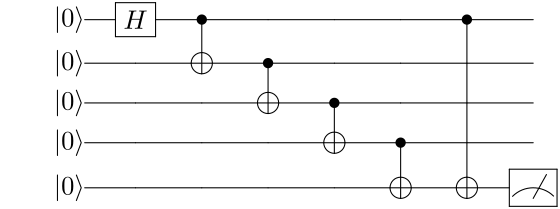

In [ ]:
ghz.draw()

In [ ]:
#export
# stabilizers for 4-qubit ghz state are XXXX and three ZZ parity checks
ghz_stabs = Circuit([{"init": {4}},
                {"H": {4}},
                {"CNOT": {(4,0)}},
                {"CNOT": {(4,1)}},
                {"CNOT": {(4,2)}},
                {"CNOT": {(4,3)}},
                {"H": {4}},
                {"measure": {4}},
                
                {"init": {4}},
                {"CNOT": {(0,4)}},
                {"CNOT": {(1,4)}},
                {"measure": {4}},
                
                {"init": {4}},
                {"CNOT": {(1,4)}},
                {"CNOT": {(2,4)}},
                {"measure": {4}},
                
                {"init": {4}},
                {"CNOT": {(2,4)}},
                {"CNOT": {(3,4)}},
                {"measure": {4}}], noisy=False)

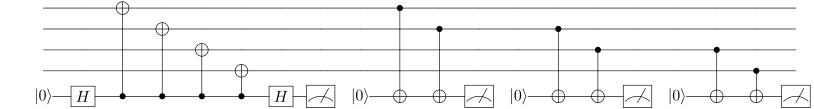

In [ ]:
ghz_stabs.draw(scale=1.2)

In [ ]:
#export
eft = Circuit([ {"init": {0,1,2,4,3,5,6,7}},
                {"H": {0,1,3}},
                {"CNOT": {(0,4)}},
                {"CNOT": {(1,2)}},
                {"CNOT": {(3,5)}},
                {"CNOT": {(0,6)}},
                {"CNOT": {(3,4)}},
                {"CNOT": {(1,5)}},
                {"CNOT": {(0,2)}},
                {"CNOT": {(5,6)}},
                {"CNOT": {(4,7)}},
                {"CNOT": {(2,7)}},
                {"CNOT": {(5,7)}},
                {"measure": {7}} ], ff_det=True)

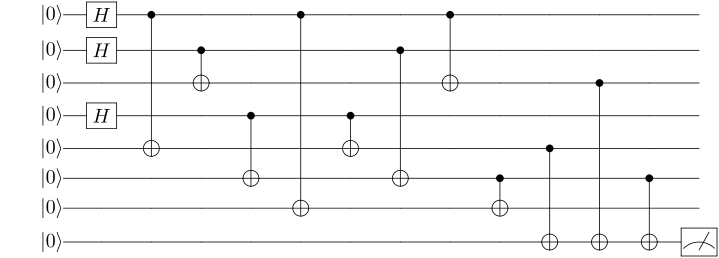

In [ ]:
eft.draw(scale=1.5)

In [ ]:
#export
sz_123 = Circuit([{"init": {8}},
                {"CNOT": {(0,8)}},
                {"CNOT": {(1,8)}},
                {"CNOT": {(3,8)}},
                {"CNOT": {(6,8)}},
                {"measure": {8}}])

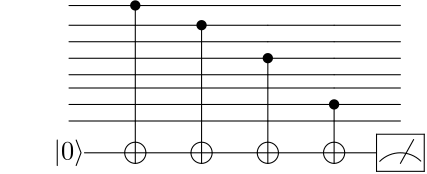

In [ ]:
sz_123.draw()

In [ ]:
#export
meas7 = Circuit([ {"measure": {0,1,2,3,4,5,6}} ])

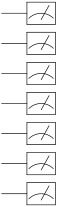

In [ ]:
meas7.draw(scale=1.2)

In [ ]:
#export
fmx_1 = Circuit([{"init": {8}},
                 {"H": {8}},
                {"init": {9}},
                {"CNOT": {(8,3)}},
                {"CNOT": {(8,9)}},
                {"CNOT": {(8,4)}},
                {"CNOT": {(8,5)}},
                {"CNOT": {(8,9)}},
                {"CNOT": {(8,6)}},
                 {"H": {8}},
                {"measure": {8}},
                {"measure": {9}} ])

fmx_2 = Circuit([{"init": {8}},
                  {"H": {8}},
                {"init": {9}},
                {"CNOT": {(8,0)}},
                {"CNOT": {(8,9)}},
                {"CNOT": {(8,2)}},
                {"CNOT": {(8,4)}},
                {"CNOT": {(8,9)}},
                {"CNOT": {(8,6)}},
                 {"H": {8}},
                {"measure": {8}},
                {"measure": {9}} ])

fmx_3 = Circuit([{"init": {8}},
              {"H": {8}},
                {"init": {9}},
                {"CNOT": {(8,1)}},
                {"CNOT": {(8,9)}},
                {"CNOT": {(8,2)}},
                {"CNOT": {(8,5)}},
                {"CNOT": {(8,9)}},
                {"CNOT": {(8,6)}},
                 {"H": {8}},
                {"measure": {8}},
                {"measure": {9}} ])

nfs = Circuit([{"init": {7,8,9}},
               {"H": {7,8,9}},
                {"CNOT": {(7,3)}},
                {"CNOT": {(7,4)}},
                {"CNOT": {(7,5)}},
                {"CNOT": {(7,6)}},
                {"CNOT": {(8,0)}},
                {"CNOT": {(8,2)}},
                {"CNOT": {(8,4)}},
                {"CNOT": {(8,6)}},
                {"CNOT": {(9,1)}},
                {"CNOT": {(9,2)}},
                {"CNOT": {(9,5)}},
                {"CNOT": {(9,6)}},
                {"H": {7,8,9}},
                {"measure": {7,8,9}},
                {"init": {7,8,9}},
                {"CNOT": {(3,7)}},
                {"CNOT": {(4,7)}},
                {"CNOT": {(5,7)}},
                {"CNOT": {(6,7)}},
                {"CNOT": {(0,8)}},
                {"CNOT": {(2,8)}},
                {"CNOT": {(4,8)}},
                {"CNOT": {(6,8)}},
                {"CNOT": {(1,9)}},
                {"CNOT": {(2,9)}},
                {"CNOT": {(5,9)}},
                {"CNOT": {(6,9)}},
                {"measure": {7,8,9}} ])

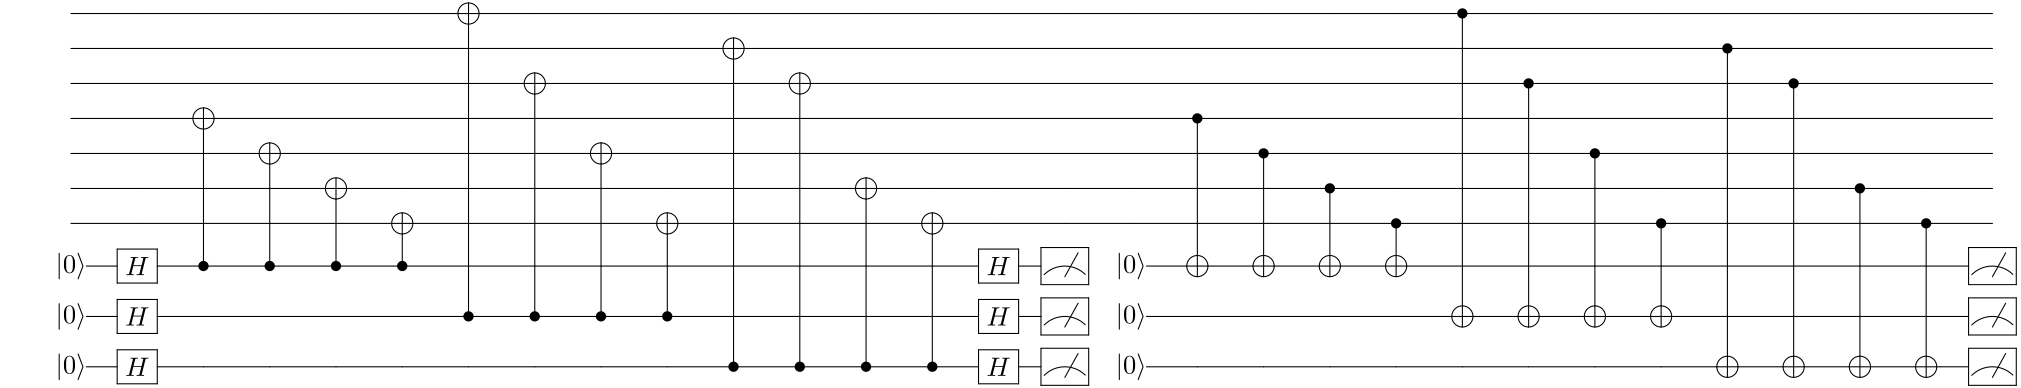

In [ ]:
nfs.draw()

# Protocols

## GHZ repeat until success protocol
* Repeat GHZ preparation circuit for a maximum of 3 times.
* Only repeat if a measurement yields `1`, i.e. the flag has been triggered.
* If we measure in all 3 runs three times `1`, count a logical failure.
* In all other cases the protocol completed without logical failure.

In [ ]:
# export
def gen_ghz3():
    
    def repeat(m):
        return len(m) < 3 and m[-1] == 1

    def logErr(m):
        return len(m) >= 3 and m == [1,1,1]

    functions = {'logErr': logErr, 'repeat': repeat}

    ghz3 = Protocol()
    ghz3._check_fns.update(functions)
    ghz3.add_nodes_from(['ghz'], circuits=[ghz])

    ghz3.add_edge('START', 'ghz', check='True')

    ghz3.add_edge('ghz', 'ghz', check='repeat(ghz)')
    ghz3.add_edge('ghz', 'FAIL', check='logErr(ghz)')
    
    ghz3._ft = True
    
    return ghz3
ghz3 = gen_ghz3()

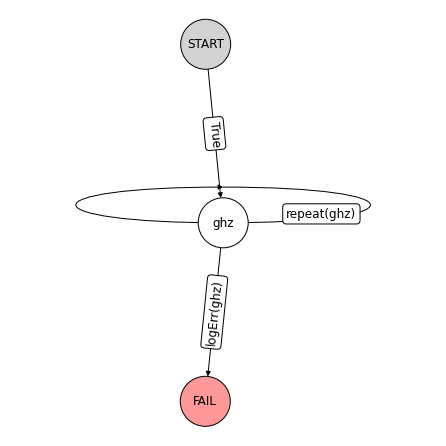

In [ ]:
ghz3.draw(figsize=(6,6))

## GHZ stabilizer measurement
* Prepare GHZ state with flag measurement `0`. (If `1` is measured repeat preparation as often as necessary)
* Reset ancilla and measure the stabilizers of the GHZ state (without noise). The stabilizers are:
    * One XXXX stab
    * and three ZZ stabs
* Use syndrom from stabilizer measurements to lookup and perform the correction.
* Measure stabilizers again.
* Now we have a logical failure if this measurement gives us any syndrome, i.e. if the measurement is anything other than four `0`s.

In [ ]:
# export
def gen_ghz_stab():
    def logErr(m):
        return m != 0b0000

    def lut(s):
        syn = format(s, '04b')
        sx = syn[0]
        sz = syn[1:]
        #print(sx, sz)

        c = Circuit(noisy=False)

        if sx == '1':
            c.insert(tick_index=0, tick={'Z': {0}})

        if sz in ['001', '100', '110', '011']: #, '101']: # '111' and '010' can only guess, '000' trivial
            corrs = {'001': {3}, '100': {0}, '110': {1}, '011': {2}} #, '101': {0,3}}
            c.insert(tick_index=0, tick={'X': corrs[sz]})

        return c

    functions = {'logErr': logErr, 'lut': lut}

    ghz_stab = Protocol()
    ghz_stab._check_fns.update(functions)
    ghz_stab.add_nodes_from(['ghz', 'meas_1', 'meas_2'], circuits=[ghz, ghz_stabs, ghz_stabs])

    ghz_stab.add_node('COR', circuit=Circuit(noisy=False))
    ghz_stab.add_edge('START', 'ghz', check='True')
    ghz_stab.add_edge('ghz', 'ghz', check='ghz[-1]==1')
    ghz_stab.add_edge('ghz', 'meas_1', check='ghz[-1]==0')
    ghz_stab.add_edge('meas_1', 'COR', check='lut(meas_1[-1])')
    ghz_stab.add_edge('COR', 'meas_2', check='True')
    ghz_stab.add_edge('meas_2', 'FAIL', check='logErr(meas_2[-1])')
    
    ghz_stab._ft = True
    
    return ghz_stab
ghz_stab = gen_ghz_stab()

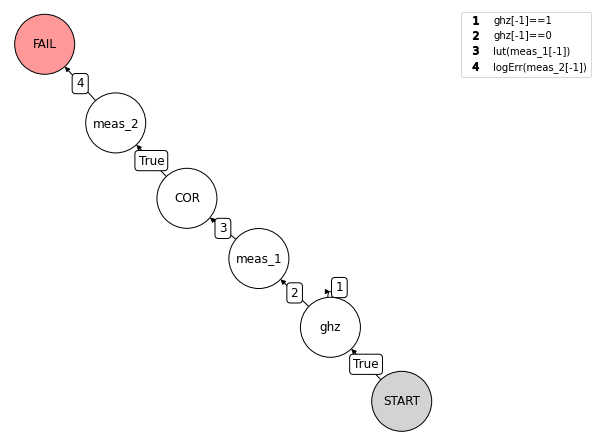

In [ ]:
ghz_stab.draw(figsize=(6,6), legend=True)

## Fault-tolerant color code flag protocol
* ...

In [ ]:
# export

def gen_ftsteane():
    k1 = 0b0001111
    k2 = 0b1010101
    k3 = 0b0110011
    k12 = k1 ^ k2
    k23 = k2 ^ k3
    k13 = k1 ^ k3
    k123 = k12 ^ k3
    stabilizerGenerators = [k1, k2, k3]
    stabilizerSet = [0, k1, k2, k3, k12, k23, k13, k123]

    def hamming2(x, y):
        count, z = 0, x ^ y
        while z:
            count += 1
            z &= z - 1
        return count

    def logErr(out):

        if min([hamming2(out, i) for i in stabilizerSet]) > 1:
            return True
        else:
            return False

    functions = {"logErr": logErr}

    # Define protocol

    ftsteane = Protocol()
    ftsteane._check_fns.update(functions)
    ftsteane.add_nodes_from(['ENC', 'meas'], circuits=[eft, meas7])

    ftsteane.add_edge('START', 'ENC', check='True')

    ftsteane.add_edge('ENC', 'ENC', check='ENC[-1]==1')
    ftsteane.add_edge('ENC', 'meas', check='ENC[-1]==0')

    ftsteane.add_edge('meas', 'FAIL', check='logErr(meas[-1])')
    
    ftsteane._ft = True
    
    return ftsteane
ftsteane = gen_ftsteane()

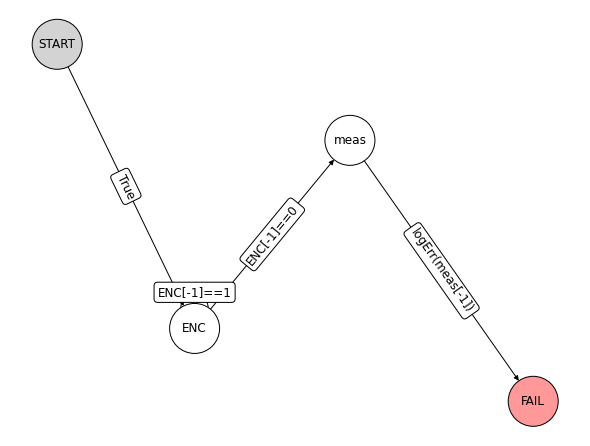

In [ ]:
ftsteane.draw(figsize=(8,6), label_offset=(0,0.15))

## Det. Steane logical 0 preparation protocol

In [ ]:
#export

def gen_steane0():
    k1 = 0b0001111
    k2 = 0b1010101
    k3 = 0b0110011
    k12 = k1 ^ k2
    k23 = k2 ^ k3
    k13 = k1 ^ k3
    k123 = k12 ^ k3
    stabilizerGenerators = [k1, k2, k3]
    stabilizerSet = [0, k1, k2, k3, k12, k23, k13, k123]

    def hamming2(x, y):
        count, z = 0, x ^ y
        while z:
            count += 1
            z &= z - 1
        return count


    def logErr(out):
        c = np.array([hamming2(out, i) for i in stabilizerSet])
        d = np.flatnonzero(c <= 1)
        e = np.array([hamming2(out ^ (0b1111111), i) for i in stabilizerSet])
        f = np.flatnonzero(e <= 1)
        if len(d) != 0:
            return False
        elif len(f) != 0:
            return True
        if len(d) != 0 and len(f) != 0: 
            raise('-!-!-CANNOT BE TRUE-!-!-')

    def flagged_z_look_up_table_1(z):
        s = [z]

        if s == [1]:
            return True
        else: 
            return False

    functions = {"logErr": logErr, "lut": flagged_z_look_up_table_1}

    init = Protocol()
    init._check_fns.update(functions)
    init.add_nodes_from(['ENC', 'Z2', 'meas'], circuits=[eft, sz_123, meas7])
    init.add_node('X_COR', circuit=Circuit([{'X': {6}}], noisy=False))

    init.add_edge('START', 'ENC', check='True')

    init.add_edge('ENC', 'meas', check='ENC[-1]==0')

    init.add_edge('ENC', 'Z2', check='ENC[-1]==1')
    init.add_edge('Z2', 'X_COR', check='lut(Z2[-1])')

    init.add_edge('X_COR', 'meas', check='True')

    init.add_edge('meas', 'FAIL', check='logErr(meas[-1])')
    
    init._ft = True
    
    return init

steane0 = gen_steane0()

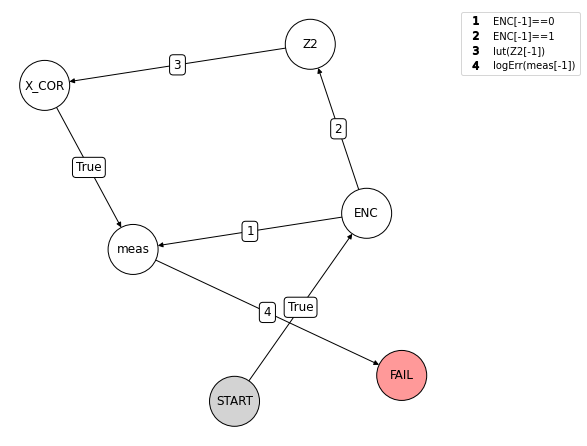

In [ ]:
steane0.draw(figsize=(6,6), legend=True)

## Flag stabilizer protocol
* ...

In [ ]:
# export
def gen_flagstab():
    k1 = 0b0001111
    k2 = 0b1010101
    k3 = 0b0110011
    k12 = k1 ^ k2
    k23 = k2 ^ k3
    k13 = k1 ^ k3
    k123 = k12 ^ k3
    stabilizerGenerators = [k1, k2, k3]
    stabilizerSet = [0, k1, k2, k3, k12, k23, k13, k123]

    def hamming2(x, y):
        count, z = 0, x ^ y
        while z:
            count += 1
            z &= z - 1
        return count

    def logErr(out):
        if min([hamming2(out, i) for i in stabilizerSet]) > 1:
            return True
        else:
            return False

    def flagged(m):
        v = 0b01 in m or 0b11 in m if m is not None else False
        #print('flag', [format(i, '02b') for i in m], ':', v)
        return v

    def flut(m, f1, f2, f3):
        formatter = lambda i,m: str(format(m, '06b')[i])

        sx = ''.join([formatter(i,m) for i in range(3)])
        sz = ''.join([formatter(i,m) for i in range(3,6)])

        if (sz == '011' and flagged(f1)) or (sz == '011' and flagged(f2)) or (sz == '011' and flagged(f3)):
            corrs = {'011': {4, 5}, '101': {2, 4}, '110': {2, 5}} #{'010': {5, 6}, '001': {4, 6}}
            return Circuit([{'X': corrs[sz]}], noisy=False)
        else: 
            return Circuit(noisy=False)

    def rep_check(m):
        # no flag triggered, run second round regardless of syndrome
        v = (m[-1] == 0b00 or m[-1] == 0b10) and len(m) == 1
        #print('rep', [format(i, '02b') for i in m], ':', v)
        return v

    def nft_check(m):
        # flag triggered in first or second round OR no flag triggered, syndromes disagree in second round
        v = (len(m) == 1 and (m[-1] == 0b01 or m[-1] == 0b11)) or (len(m) == 2 and ((m[-1] == 0b00 and m[-2] == 0b10) or (m[-1] == 0b10 and m[-2] == 0b00) or (m[-1] == 0b01 or m[-1] == 0b11)))
        #print('nft', [format(i, '02b') for i in m], ':', v)
        return v

    def syn_check(m):
        # no flag triggered, syndromes agree in second round
        v = len(m) == 2 and ((m[-1] == 0b00 and m[-2] == 0b00) or (m[-1] == 0b10 and m[-2] == 0b10))
        #print('syn', [format(i, '02b') for i in m], ':', v)
        return v  


    functions = {"logErr": logErr, "flut": flut, "rep_check": rep_check, "nft_check": nft_check, "syn_check": syn_check}

    # Define protocol

    flagstab = Protocol()
    flagstab._check_fns.update(functions)
    flagstab.add_nodes_from(['X1', 'X2', 'X3', 'nonFT', 'meas'], circuits=[fmx_1, fmx_2, fmx_3, nfs, meas7])
    flagstab.add_node('COR', circuit=Circuit(noisy=False))

    flagstab.add_edge('START', 'X1', check='True')

    # no flag triggered, run second round regardless of syndrome
    flagstab.add_edge('X1', 'X1', check='rep_check(X1)')
    flagstab.add_edge('X2', 'X2', check='rep_check(X2)')
    flagstab.add_edge('X3', 'X3', check='rep_check(X3)')

    # flag triggered in first or second round OR no flag triggered, syndromes disagree in second round
    flagstab.add_edge('X1', 'nonFT', check='nft_check(X1)')
    flagstab.add_edge('X2', 'nonFT', check='nft_check(X2)')
    flagstab.add_edge('X3', 'nonFT', check='nft_check(X3)')

    # no flag triggered, syndromes agree in second round
    flagstab.add_edge('X1', 'X2', check='syn_check(X1)')#False if rep_check(X1) or nft_check(X1) else True')
    flagstab.add_edge('X2', 'X3', check='syn_check(X2)')#'False if rep_check(X2) or nft_check(X2) else True')
    flagstab.add_edge('X3', 'meas', check='syn_check(X3)')#'False if rep_check(X3) or nft_check(X3) else True')

    # apply flag correction after nonFT if a flag was triggered
    flagstab.add_edge('nonFT', 'COR', check='flut(nonFT[-1], X1, X2, X3)')

    flagstab.add_edge('COR', 'meas', check='True')

    flagstab.add_edge('meas', 'FAIL', check='logErr(meas[-1])')
    
    flagstab._ft = True
    
    return flagstab

flagstab = gen_flagstab()

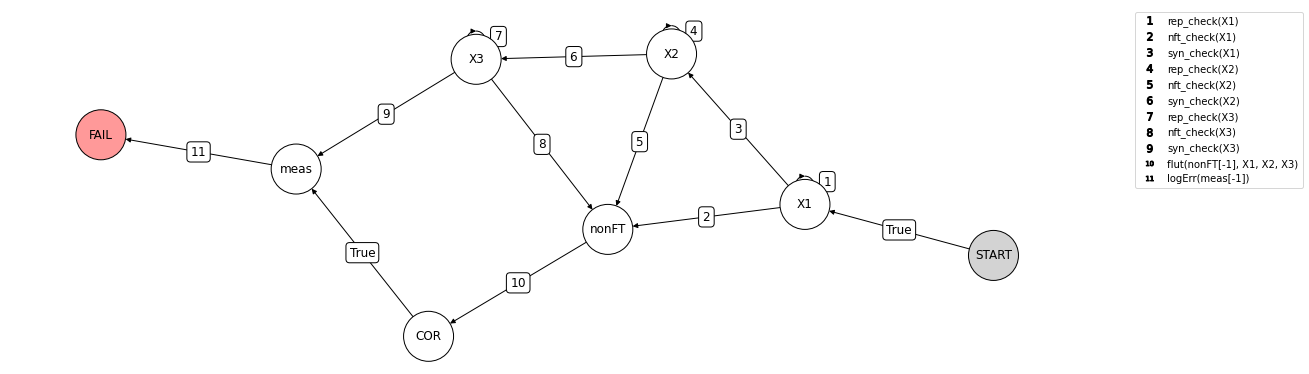

In [ ]:
flagstab.draw(legend=True, figsize=(15,5))

# Samplings

In [ ]:
from qsam.sampler.direct import DirectSampler
from qsam.sampler.subset import SubsetSampler
from qsam.faultgen import AllGateFaults, CombinedOneTwo
from qsam.callbacks import *

from qsam.sim.stabilizer import StabilizerSimulator as CHP
import numpy as np

Total:   0%|          | 0/5 [00:00<?, ?it/s]

p_phy=1.00E-03:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=5.62E-03:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=3.16E-02:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=1.78E-01:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=1.00E+00:   0%|          | 0/10000 [00:00<?, ?it/s]

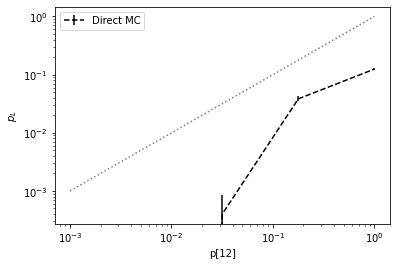

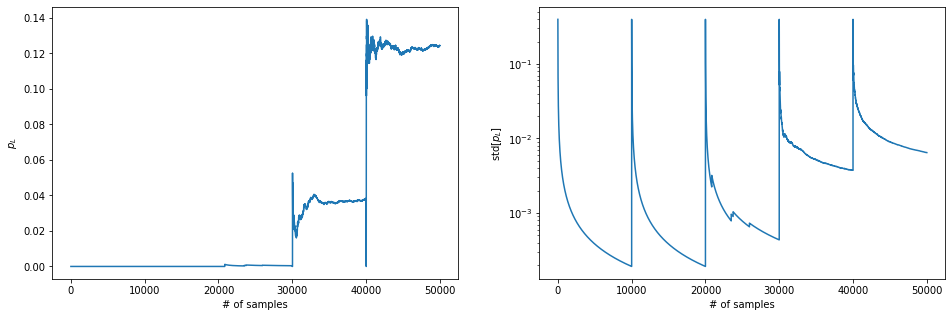

In [ ]:
sample_range = np.logspace(-3,0,5)
err_params = {'p': sample_range} # connection to locgrps? Make more explicit!

fg = CombinedOneTwo()
sam = DirectSampler(ghz3, CHP, fault_gen=fg)
callbacks = [
    PlotStats(),
    StatsPerSample()
]
sam.run(10000, err_params, callbacks=callbacks)

Total:   0%|          | 0/1 [00:00<?, ?it/s]

p_phy=1.00E-01:   0%|          | 0/300 [00:00<?, ?it/s]

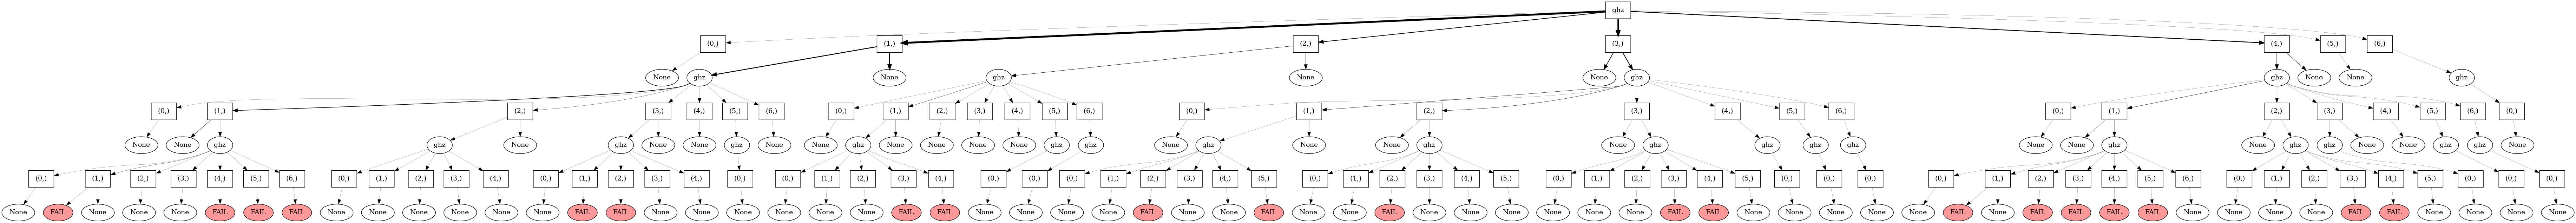

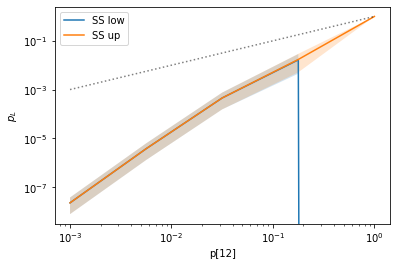

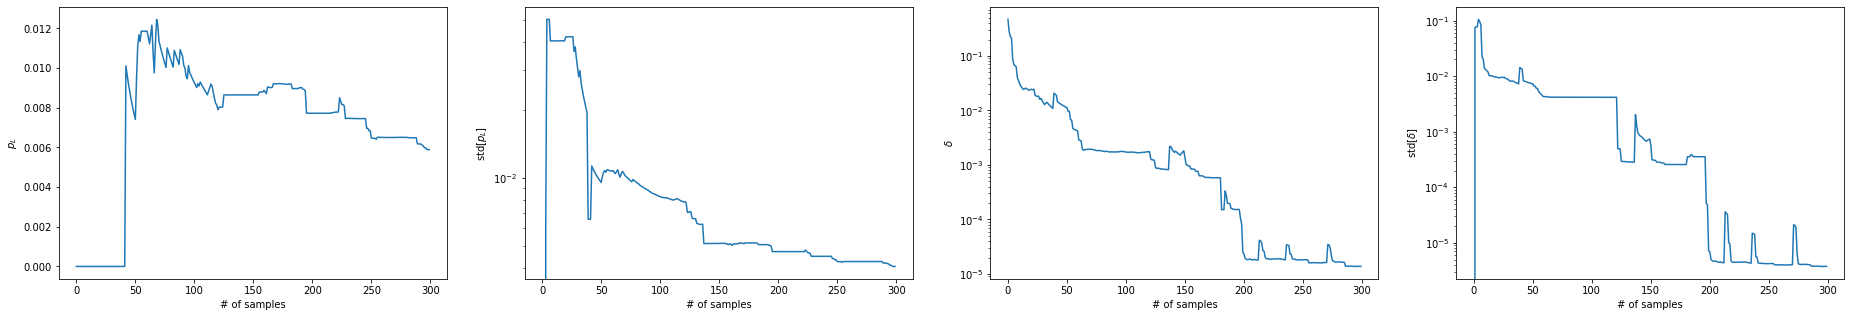

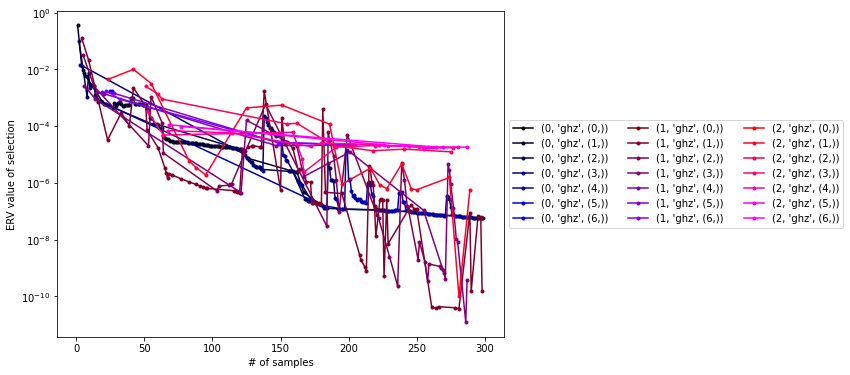

In [ ]:
sam2 = SubsetSampler(ghz3, CHP, fault_gen=fg)
callbacks = [
    PlotStats(err_params),
    StatsPerSample(),
    ErvPerSample()
]
pmax = {"p": 0.1} # other pmax?
sam2.run(300, pmax, callbacks=callbacks)
sam2.tree.draw()

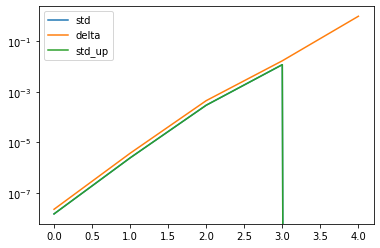

In [ ]:
import matplotlib.pyplot as plt
# sam2.tree.draw()

stats = sam2.stats(err_params)
plt.plot(stats[1], label='std')
plt.plot(stats[2], label='delta')
plt.plot(stats[3], label='std_up')
plt.yscale('log')
plt.legend()

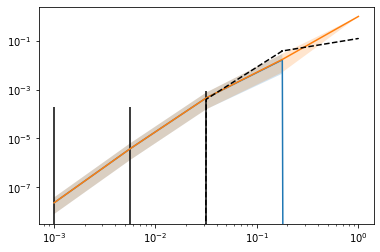

In [ ]:
#slow
import matplotlib.pyplot as plt

p_L, std = sam.stats()
p_L_low, ss_std_low, p_L_up, ss_std_up = sam2.stats(err_params)

plt.errorbar(sample_range, p_L, fmt='--', c="black", yerr=std, label="Direct MC")

plt.plot(sample_range, p_L_low, label='SS low')
plt.fill_between(sample_range, p_L_low-ss_std_low, p_L_low+ss_std_low, alpha=0.2)
plt.plot(sample_range, p_L_up, label='SS low')
plt.fill_between(sample_range, p_L_up-ss_std_up, p_L_up+ss_std_up, alpha=0.2)
plt.xscale('log')
plt.yscale('log')

Total:   0%|          | 0/1 [00:00<?, ?it/s]

p_phy=1.00E-02:   0%|          | 0/100 [00:00<?, ?it/s]

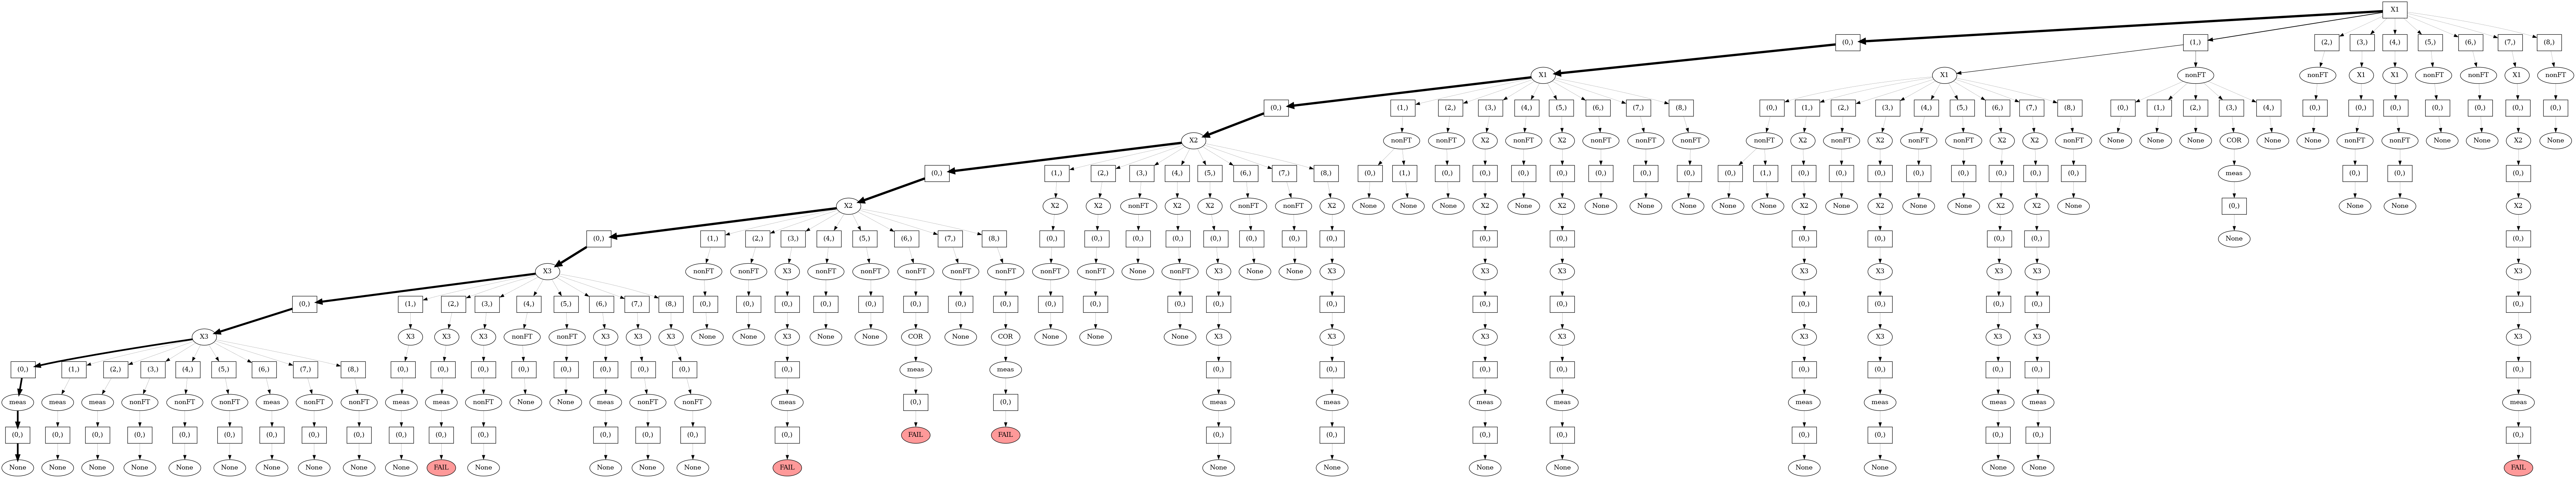

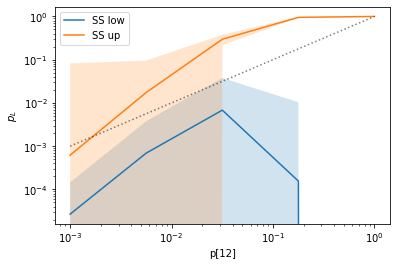

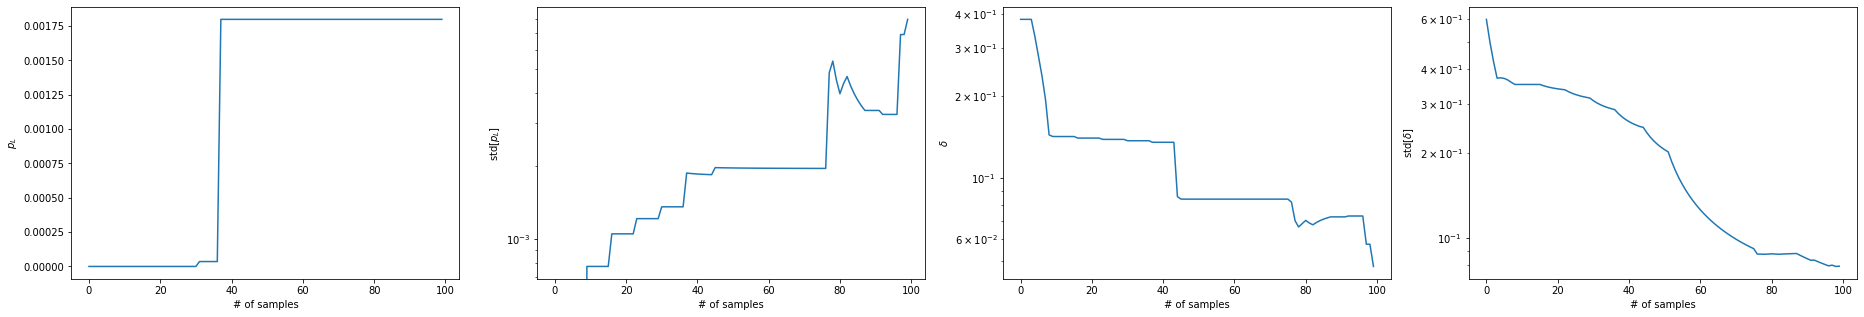

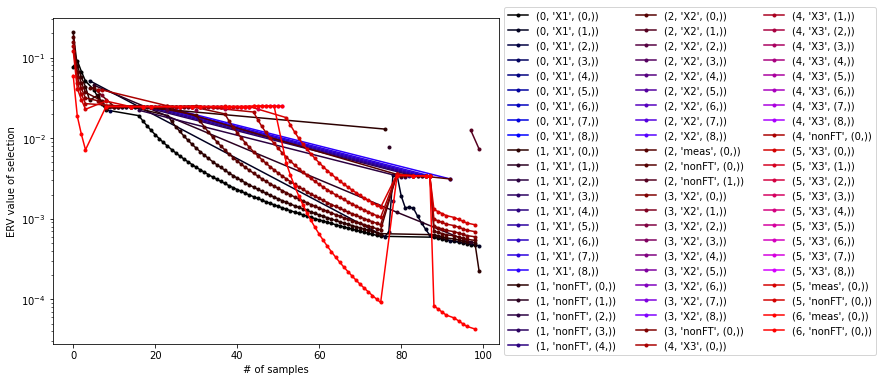

In [ ]:
sam2 = SubsetSampler(flagstab, CHP, fault_gen=fg)
callbacks = [
    PlotStats(err_params),
    StatsPerSample(),
    ErvPerSample()
]
pmax = {"p": 0.01}
sam2.run(100, pmax, callbacks=callbacks)
sam2.tree.draw()

True

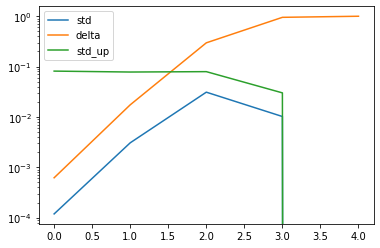

In [ ]:
import matplotlib.pyplot as plt
# sam2.tree.draw()

stats = sam2.stats(err_params)
plt.plot(stats[1], label='std')
plt.plot(stats[2], label='delta')
plt.plot(stats[3], label='std_up')
plt.yscale('log')
plt.legend()